In [13]:
import urllib
from io import StringIO
from io import BytesIO
import csv
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
import pandas as pd
import scipy.signal as signal

In [14]:
datos1 = pd.read_csv('https://raw.githubusercontent.com/ComputoCienciasUniandes/FISI2029-201910/master/Seccion_1/Fourier/Datos/transacciones2008.txt',delimiter = ';', header = None, decimal = ',')
datos2 = pd.read_csv('https://raw.githubusercontent.com/ComputoCienciasUniandes/FISI2029-201910/master/Seccion_1/Fourier/Datos/transacciones2009.txt',delimiter = ';', header = None, decimal = ',')
datos3 = pd.read_csv('https://raw.githubusercontent.com/ComputoCienciasUniandes/FISI2029-201910/master/Seccion_1/Fourier/Datos/transacciones2010.txt',delimiter = ';', header = None, decimal = ',')
datos = [datos1,datos2,datos3]
datos = pd.concat(datos)

In [15]:
datos[0] = datos[0].str[0:-8:1]
datos[1] = datos[1].str[10:]
datos[0] = datos[0] + datos[1]
datos[0]=pd.to_datetime(datos[0],format='%d/%m/%Y %H:%M:%S')
datos.set_index(datos[0],inplace=True)

In [16]:
fecha = np.array(datos[0])
del datos[0]
del datos[1]
del datos[3]

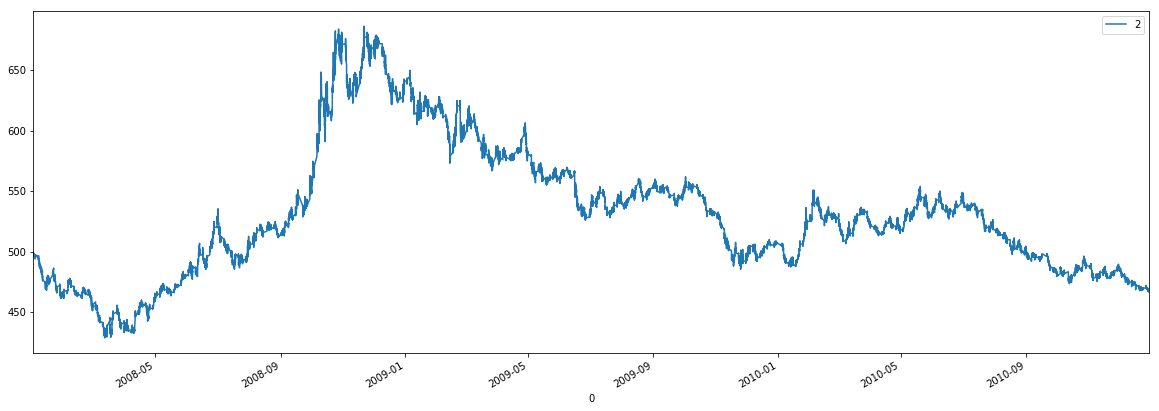

In [22]:
datos.plot(figsize=(20,7))
plt.savefig('datos.png')

In [23]:
precio = np.array(datos[2])

In [24]:
N  = 2    # Orden del filtro
Wn = 1E-4 # Corte de frecuancia
B, A = signal.butter(N, Wn)
precio_filtrada = signal.filtfilt(B,A, precio)

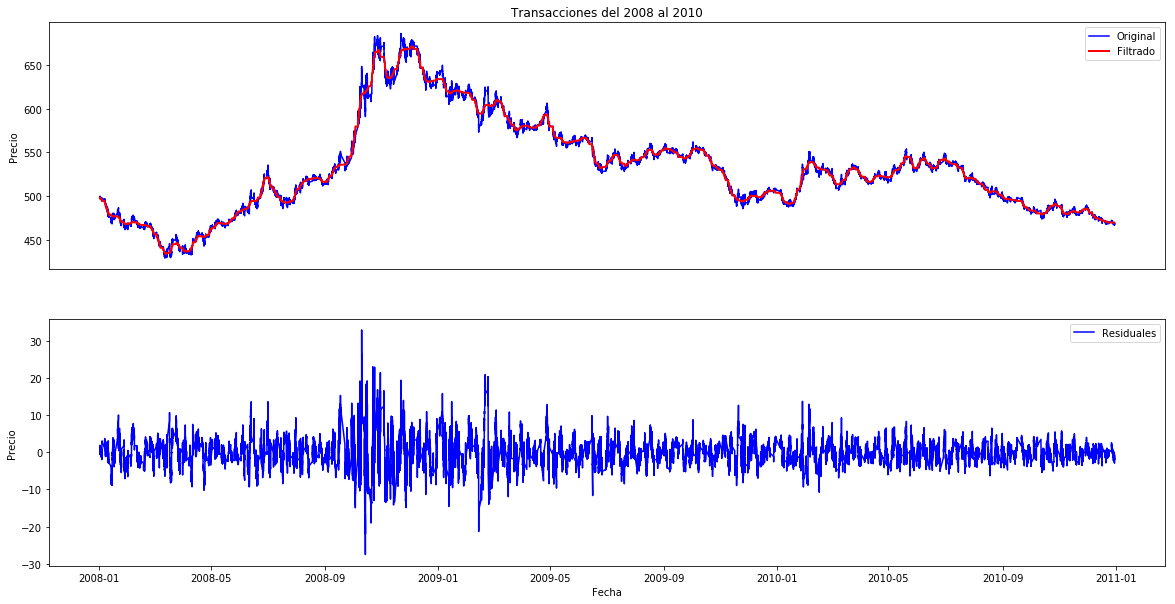

In [25]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
plt.plot(fecha,precio, 'b-')
plt.plot(fecha,precio_filtrada, 'r-',linewidth=2)
plt.ylabel(r"Precio")
plt.legend(['Original','Filtrado'])
plt.title("Transacciones del 2008 al 2010")
ax1.axes.get_xaxis().set_visible(False)
ax1 = fig.add_subplot(212)
plt.plot(fecha,precio-precio_filtrada, 'b-')
plt.ylabel(r"Precio")
plt.xlabel("Fecha")
plt.legend(['Residuales'])
plt.savefig('filtro.png')

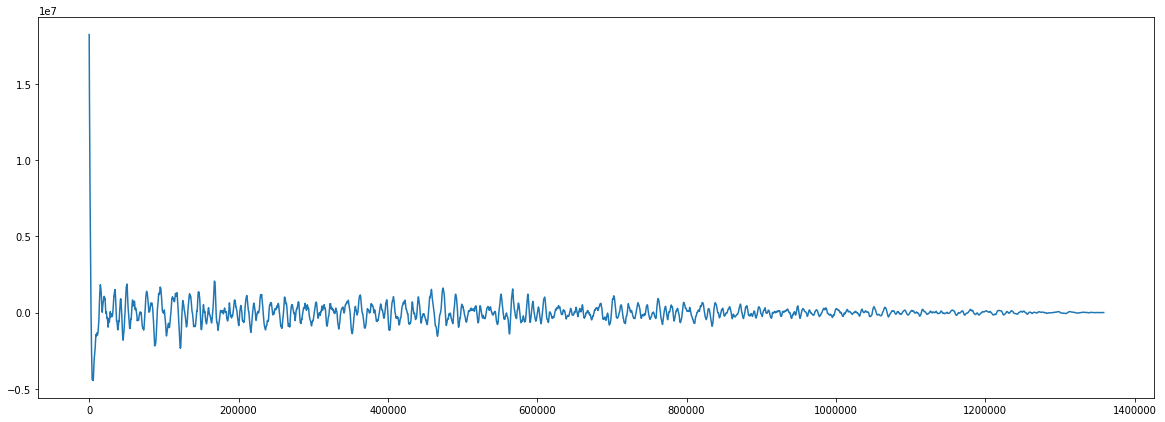

In [26]:
plt.figure(figsize=(20,7))
ruido=precio-precio_filtrada
corr=signal.correlate(ruido,ruido,mode="full")
plt.plot(corr[len(corr)//2:])
plt.savefig('correlacion.png')